# Import Packages

In [1]:
import pandas as pd
import sys
import os
import pymc as pm

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

from ev_forecasting_package.data_processing.VehicleRegistrationDataProcessing import VehicleStockModelDataPrepper
from ev_forecasting_package.models.VehicleStockDynamics import VehicleStockDynamicsInferenceModel

In [7]:
vehicle_stock_model_data_prepper = VehicleStockModelDataPrepper()
year_quarter = '2023_Q4'
file_names = {
    'stock_eng': f'stock_df_{year_quarter}.csv',
    'additions_eng': f'sales_df_{year_quarter}.csv',
    'v_lsoa': f'v_lsoa_{year_quarter}.csv',
    'icev_lsoa': f'icev_lsoa_{year_quarter}.csv',
    'ev_lsoa': f'ev_lsoa_{year_quarter}.csv',
    'bev_lsoa': f'bev_lsoa_{year_quarter}.csv',
    'phev_lsoa': f'phev_lsoa_{year_quarter}.csv'
}
vehicle_stock_model_data_prepper.prepare_data(
    data_path='../data/large_datasets/vehicle_registrations/processed_data', 
    file_names=file_names, 
    lsoa_subset=20, 
    t_0=2021,
    t_0_raw=2020, 
    t_n=2023
)

In [8]:
model = VehicleStockDynamicsInferenceModel(
    model_variables_dict=vehicle_stock_model_data_prepper.model_variables_dict, 
    annual_data_dict=vehicle_stock_model_data_prepper.annual_data_dict, 
    lsoa_idxs=vehicle_stock_model_data_prepper.lsoa_subset
)
model.build_model()
trace = model.sample()
model.save_trace('.')
posterior_means = model.calculate_posterior_means()

Model built successfully


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p_A, p_R, a, b]
>CompoundStep
>>Metropolis: [A_vehicles]
>>Metropolis: [R_vehicles]


Output()

/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 18 seconds.
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Trace saved to .
Posterior means calculated successfully


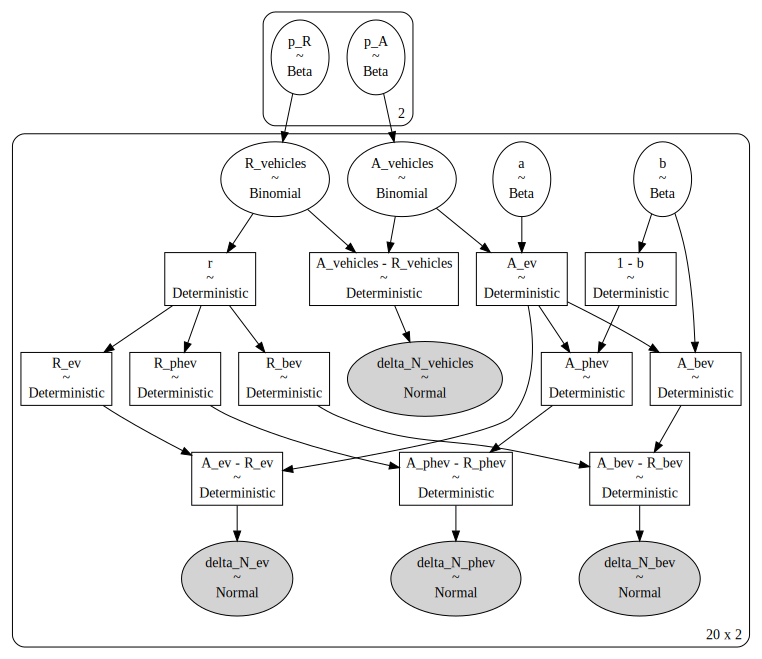

In [4]:
pm.model_to_graphviz(model.model)

In [9]:
model.lsoa_data_dict[model.lsoa_idxs[0]]

,v_lsoa,icev_lsoa,ev_lsoa,bev_lsoa,phev_lsoa,ev_market_share,bev_market_share,phev_market_share,A_vehicles,R_vehicles,A_ev,R_ev,A_bev,R_bev,A_phev,R_phev,a,b,1 - b
Year,,,,,,,,,,,,,,,,,,,
2020,365.0,360.0,5.0,5.0,1.0,0.013699,0.013699,0.002740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,380.0,372.0,8.0,6.0,2.0,0.021053,0.015789,0.005263,23.00,8.00,2.833647,0.168421,1.458737,0.126316,1.374910,0.042105,0.126329,0.514597,0.485403
2022,356.0,344.0,12.0,8.0,4.0,0.033708,0.022472,0.011236,7.75,31.75,5.056469,1.070225,2.706634,0.713483,2.349835,0.356742,0.688896,0.535264,0.464736
2023,356.0,342.0,14.0,11.0,4.0,0.039326,0.030899,0.011236,15.25,15.25,3.048272,0.599719,3.019049,0.471208,0.029222,0.171348,0.214137,0.990481,0.009519


In [5]:
model.lsoa_idxs[0]

'E01014370'

In [10]:
model.posterior_means

{'A_vehicles':       E01014370  E01014371  E01014372  E01014373  E01014374  E01014375  \
 2021      23.00      28.25      43.00       39.5      50.75      46.25   
 2022       7.75      15.50      16.75       32.0      38.50      34.75   
 2023      15.25      30.00      23.75       42.0      36.50      38.25   
 
       E01014376  E01014377  E01014379  E01014380  E01014381  E01014382  \
 2021      51.75      38.25      73.75      51.00      34.50      80.75   
 2022      37.50      34.75      55.00      51.25      28.25      74.75   
 2023      49.50      37.50      74.50      43.00      39.00      90.75   
 
       E01014383  E01014384  E01014385  E01014386  E01014387  E01014388  \
 2021      47.50      56.25      56.50      29.25      39.25      32.75   
 2022      26.50      44.50      45.75      29.00      32.50      29.00   
 2023      43.75      52.00      60.00      26.75      36.75      34.00   
 
       E01014389  E01014390  
 2021      73.25      19.75  
 2022      71.50    